In [1]:
from kafka import KafkaConsumer
from kafka import KafkaConsumer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from json import dumps
import numpy as np
import pickle
from sklearn.metrics import classification_report,accuracy_score
import pickle
import matplotlib.pyplot as plt


In [2]:
consumer = KafkaConsumer(
    'ml-raw-dns',
    bootstrap_servers="localhost:9092",
    auto_offset_reset='earliest',
    enable_auto_commit=False
)

In [3]:
for m in consumer:
        m.value
        break

In [4]:
def get_1000_rec(itr):
    list_of_1000_rec=[]
    i=0
    for c in consumer:

        if i <1000:
            list_of_1000_rec.append(c.value)
            i=i+1
        else:

            break
    print(f"Window {itr}")


    return list_of_1000_rec

In [5]:
col_names =["timestamp","FQDN_count","subdomain_length","upper","lower","numeric","entropy","special","labels","labels_max","labels_average","longest_word","sld","len","subdomain","Target Attack"]
def adjust_data( data):
    dataframe=pd.DataFrame()
    list_of_rows=[]
    for item in data:
        row_string=eval(item.decode("UTF-8"))
        row_string = row_string.strip()
        row= row_string.split(",")
        list_of_rows.append(row)
    dataframe=pd.DataFrame(list_of_rows)
    dataframe.columns=col_names
    return dataframe


In [6]:
def cleaning_the_data(data):
    cleaned_data = (
        data.replace({'longest_word': r'(([a-z]+)|([A-Z]+)|'')'}, 2, regex=True)
            .fillna({'longest_word': 2})
            .replace({'sld': r'(([a-z]+)|([A-Z]+|(0-1)))'}, 192, regex=True)
            .astype({'sld': 'int'})
            .drop('timestamp', axis=1)
            .astype('float')
    )
    return cleaned_data


In [7]:
def retrain(data):
    return (
        Pipeline(steps=[
            ("MI with RF", SelectKBest(score_func=mutual_info_classif, k=8)),
            ("RandomForestClassifier", RandomForestClassifier())
        ])
        .fit(data.drop(labels=["Target Attack"], axis=1), data["Target Attack"])
    )


In [8]:
pickle.load(open('the model2.pkl', 'rb'))

C:\Users\DEBI_2023\anaconda3\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\DEBI_2023\anaconda3\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator SelectKBest from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\DEBI_2023\anaconda3\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use 

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('feature_selection',
                 SelectKBest(k=8,
                             score_func=<function mutual_info_classif at 0x000001FA34683D90>)),
                ('classifier',
                 RandomForestClassifier(n_estimators=50, random_state=42))])

In [9]:
static_model = Dynamic_model= pickle.load(open('the model.pkl', 'rb'))

In [10]:
# Load the initial training data
training_data = adjust_data(get_1000_rec(0))
training_data = cleaning_the_data(training_data)

Window 0


In [11]:
training_data

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,13.0,0.0,0.0,12.0,0.0,2.781301,1.0,2.0,10.0,6.000000,2.0,192.0,11.0,0.0,0.0
1,25.0,8.0,0.0,10.0,9.0,2.786216,6.0,6.0,7.0,3.333333,2.0,192.0,12.0,1.0,0.0
2,8.0,0.0,0.0,6.0,0.0,2.154135,2.0,2.0,5.0,3.500000,2.0,192.0,6.0,0.0,0.0
3,20.0,3.0,0.0,18.0,0.0,2.905639,2.0,3.0,12.0,6.000000,2.0,192.0,16.0,1.0,0.0
4,27.0,10.0,0.0,10.0,11.0,2.767195,6.0,6.0,7.0,3.666667,2.0,192.0,14.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,13.0,0.0,0.0,10.0,2.0,2.989735,1.0,2.0,9.0,6.000000,2.0,192.0,10.0,0.0,0.0
996,24.0,7.0,0.0,10.0,8.0,2.054029,6.0,6.0,7.0,3.166667,2.0,224.0,11.0,1.0,0.0
997,11.0,0.0,0.0,10.0,0.0,2.817711,1.0,2.0,8.0,5.000000,2.0,192.0,9.0,0.0,0.0
998,12.0,0.0,0.0,11.0,0.0,2.514247,1.0,2.0,9.0,5.500000,2.0,192.0,10.0,0.0,0.0


In [12]:
training_data=cleaning_the_data(adjust_data(get_1000_rec(0)))
list_of_f1_Dynmaic_model=[]
list_of_f1_static_model=[]
for itr in range(1,200):
    r_dataset = get_1000_rec(itr)
    p_dataset =  adjust_data(r_dataset)
    new_dataset =  cleaning_the_data(p_dataset)
    X =new_dataset.drop(labels = ["Target Attack"], axis=1)
    y=new_dataset["Target Attack"]

    Dy_pred=Dynamic_model.predict(X)
    D_f1=accuracy_score(y,Dy_pred)
    print(f"The accuracy Score of Dynamic Model without retrain = {D_f1*100}%")
    if D_f1 < 0.81 :

        print(" trained model on the new data")
        Dynamic_model=retrain(training_data)
        Dy_pred=Dynamic_model.predict(X)
        D_f1=accuracy_score(y,Dy_pred)
        print(f"The accuracy of Dynamic Model after retrain = {D_f1*100}%")
    training_data=pd.concat([training_data,new_dataset])
    Sy_pred=static_model.predict(X)
    S_f1=accuracy_score(y,Sy_pred)
    print(f"The accuracy of Static Model = {S_f1*100}%")
    list_of_f1_Dynmaic_model.append(D_f1)
    list_of_f1_static_model.append(S_f1)
    print(f"{'*'*10}")

Window 0
Window 1
The accuracy Score of Dynamic Model without retrain = 79.60000000000001%
 trained model on the new data
The accuracy of Dynamic Model after retrain = 79.5%
The accuracy of Static Model = 79.60000000000001%
**********
Window 2
The accuracy Score of Dynamic Model without retrain = 81.5%
The accuracy of Static Model = 81.69999999999999%
**********
Window 3
The accuracy Score of Dynamic Model without retrain = 80.10000000000001%
 trained model on the new data
The accuracy of Dynamic Model after retrain = 80.10000000000001%
The accuracy of Static Model = 80.7%
**********
Window 4
The accuracy Score of Dynamic Model without retrain = 81.10000000000001%
The accuracy of Static Model = 81.10000000000001%
**********
Window 5
The accuracy Score of Dynamic Model without retrain = 80.7%
 trained model on the new data
The accuracy of Dynamic Model after retrain = 81.0%
The accuracy of Static Model = 81.10000000000001%
**********
Window 6
The accuracy Score of Dynamic Model without 

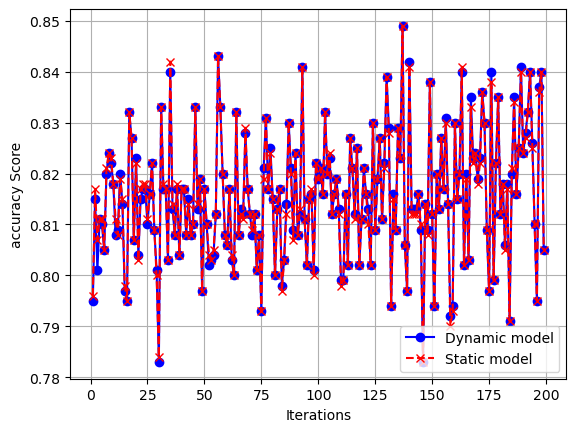

In [13]:
plt.plot(range(1, 200), list_of_f1_Dynmaic_model, linestyle='-', marker='o', color='blue', label='Dynamic model')
plt.plot(range(1, 200), list_of_f1_static_model, linestyle='--', marker='x', color='red', label='Static model')

plt.xlabel('Iterations')
plt.ylabel("accuracy Score")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
